Good call! According to the "KISS" rule, or the "principle of parsimony", the simplest explanation of an event or observation is the preferred one. Therefore always choose a parsimonious model over a complex model given comparable predicting power.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from arch import arch_model
sp_data = pd.read_csv('./SP500.csv', index_col=0, parse_dates=True)

In [3]:
basic_gm = arch_model(sp_data['Return'].dropna(), p = 1, q = 1, 
                      mean = 'constant', vol = 'GARCH')
# Fit the model
gm_result = basic_gm.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 14832.611200289291
Iteration:      2,   Func. Count:     16,   Neg. LLF: 22318901155.18984
Iteration:      3,   Func. Count:     24,   Neg. LLF: 4226.89994318323
Iteration:      4,   Func. Count:     31,   Neg. LLF: 3733.82264970074
Iteration:      5,   Func. Count:     37,   Neg. LLF: 2782.9233125218548
Iteration:      6,   Func. Count:     43,   Neg. LLF: 2775.3216574742
Iteration:      7,   Func. Count:     49,   Neg. LLF: 2771.988661563638
Iteration:      8,   Func. Count:     54,   Neg. LLF: 2771.9655475955396
Iteration:      9,   Func. Count:     59,   Neg. LLF: 2771.9642779830683
Iteration:     10,   Func. Count:     64,   Neg. LLF: 2771.963838327781
Iteration:     11,   Func. Count:     69,   Neg. LLF: 2771.963828246164
Iteration:     12,   Func. Count:     73,   Neg. LLF: 2771.963828246917
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2771.963828246164
            Iterations: 12
 

In [4]:
# Print model fitting summary
print(gm_result.summary())

# Get parameter stats from model summary
para_summary = pd.DataFrame({'parameter':gm_result.params,
                             'p-value': gm_result.pvalues})

# Print out parameter stats
print(para_summary)

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2771.96
Distribution:                  Normal   AIC:                           5551.93
Method:            Maximum Likelihood   BIC:                           5574.95
                                        No. Observations:                 2336
Date:                Sun, Dec 03 2023   Df Residuals:                     2335
Time:                        11:30:13   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0772  1.445e-02      5.345  9.031e-08 [4.892e-0

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:1890: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(table_val[pos], (np.float64, float)):
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:1891: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  assert isinstance(table_val[pos], float)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:1892: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will alw

In [5]:
# Get parameter stats from model summary
para_summary = pd.DataFrame({'parameter':gm_result.params,
                             'std-err': gm_result.std_err, 
                             't-value': gm_result.tvalues})

# Verify t-value by manual calculation
calculated_t = para_summary['parameter']/para_summary['std-err']

# Print calculated t-statistic
print(calculated_t)

# Print parameter stats
print(para_summary)

mu           5.345211
omega        4.311785
alpha[1]     6.243327
beta[1]     28.896980
dtype: float64
          parameter   std-err    t-value
mu         0.077239  0.014450   5.345211
omega      0.039587  0.009181   4.311785
alpha[1]   0.167963  0.026903   6.243327
beta[1]    0.786467  0.027216  28.896980


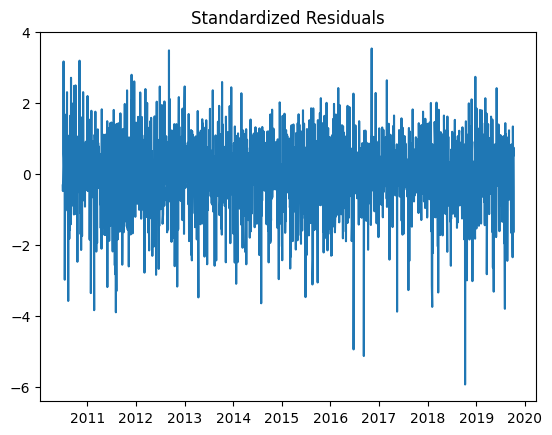

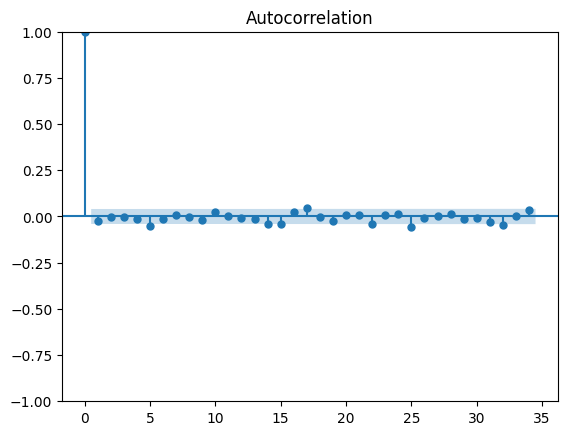

In [6]:
# Import the Python module
from statsmodels.graphics.tsaplots import plot_acf
std_resid = gm_result.resid/gm_result.conditional_volatility
# Plot the standardized residuals
plt.plot(std_resid)
plt.title('Standardized Residuals')
plt.show()

# Generate ACF plot of the standardized residuals
plot_acf(std_resid, alpha = 0.05)
plt.show()

In [7]:
# Import the Python module
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test
lb_test = acorr_ljungbox(std_resid , lags = 10, return_df = True)

# Print the p-values
print('P-values are: ', lb_test.iloc[0,1])

P-values are:  0.23421339583994122


Good call! AIC imposes penalties on model complexity. A model with more parameters will have higher information criterion score given the same likelihood values. Hence the smaller the AIC, the better the model.

In [9]:
normal_result = arch_model(sp_data['Return'].dropna(), p = 1, q = 1, 
                           mean = 'constant', vol = 'GARCH', 
                           dist = 'normal').fit()
skewt_result = arch_model(sp_data['Return'].dropna(), p = 1, q = 1, 
                          mean = 'constant', vol = 'GARCH', 
                          dist = 'skewt').fit()
# Print normal GARCH model summary
print(normal_result.summary())
# Print skewed GARCH model summary
print(skewt_result.summary())



Iteration:      1,   Func. Count:      6,   Neg. LLF: 14832.611200289291
Iteration:      2,   Func. Count:     16,   Neg. LLF: 22318901155.18984
Iteration:      3,   Func. Count:     24,   Neg. LLF: 4226.89994318323
Iteration:      4,   Func. Count:     31,   Neg. LLF: 3733.82264970074
Iteration:      5,   Func. Count:     37,   Neg. LLF: 2782.9233125218548
Iteration:      6,   Func. Count:     43,   Neg. LLF: 2775.3216574742
Iteration:      7,   Func. Count:     49,   Neg. LLF: 2771.988661563638
Iteration:      8,   Func. Count:     54,   Neg. LLF: 2771.9655475955396
Iteration:      9,   Func. Count:     59,   Neg. LLF: 2771.9642779830683
Iteration:     10,   Func. Count:     64,   Neg. LLF: 2771.963838327781
Iteration:     11,   Func. Count:     69,   Neg. LLF: 2771.963828246164
Iteration:     12,   Func. Count:     73,   Neg. LLF: 2771.963828246917
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2771.963828246164
            Iterations: 12
 

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:1890: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(table_val[pos], (np.float64, float)):
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:1891: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  assert isinstance(table_val[pos], float)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:1892: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will alw

In [10]:
# Print the log-likelihood of normal GARCH
print('Log-likelihood of normal GARCH :', normal_result.loglikelihood)
# Print the log-likelihood of skewt GARCH
print('Log-likelihood of skewt GARCH :', skewt_result.loglikelihood)

Log-likelihood of normal GARCH : -2771.963828246164
Log-likelihood of skewt GARCH : -2689.9795443769394


In [12]:
gjrgm_result = arch_model(sp_data['Return'].dropna(), p = 1, q = 1, 
                          mean = 'constant', vol = 'GARCH', 
                          dist = 'skewt', o = 1).fit()
egarch_result = arch_model(sp_data['Return'].dropna(), p = 1, q = 1, 
                           mean = 'constant', vol = 'EGARCH', 
                           dist = 'skewt').fit()


Iteration:      1,   Func. Count:      9,   Neg. LLF: 92741.51091759487
Iteration:      2,   Func. Count:     21,   Neg. LLF: 85765.0164936471
Iteration:      3,   Func. Count:     31,   Neg. LLF: 76080.79200764318
Iteration:      4,   Func. Count:     41,   Neg. LLF: 119038.7578611534
Iteration:      5,   Func. Count:     50,   Neg. LLF: 2936.1742485818504
Iteration:      6,   Func. Count:     59,   Neg. LLF: 3274.1007828824595
Iteration:      7,   Func. Count:     68,   Neg. LLF: 2654.4766136176568
Iteration:      8,   Func. Count:     77,   Neg. LLF: 2652.4604216237585
Iteration:      9,   Func. Count:     86,   Neg. LLF: 2630.736814148305
Iteration:     10,   Func. Count:     94,   Neg. LLF: 2630.702507394287
Iteration:     11,   Func. Count:    102,   Neg. LLF: 2630.6516730177755
Iteration:     12,   Func. Count:    110,   Neg. LLF: 2630.65121249853
Iteration:     13,   Func. Count:    118,   Neg. LLF: 2630.651177091958
Iteration:     14,   Func. Count:    126,   Neg. LLF: 2630.65

In [13]:
# Print the AIC GJR-GARCH
print('AIC of GJR-GARCH model :', gjrgm_result.aic)
# Print the AIC of EGARCH
print('AIC of EGARCH model :', egarch_result.aic)

# Print the BIC GJR-GARCH
print('BIC of GJR-GARCH model :', gjrgm_result.bic)
# Print the BIC of EGARCH
print('BIC of EGARCH model :', egarch_result.bic)

AIC of GJR-GARCH model : 5275.302350250951
AIC of EGARCH model : 5398.785095202136
BIC of GJR-GARCH model : 5315.595717658588
BIC of EGARCH model : 5433.322267265825


Amazing job! Both AIC and BIC of the EGARCH model are lower, hence EGARCH is relatively better.

In [18]:
sp_data['Return'].dropna()['2019-06-28':'2019-12-31']

Date
2019-06-28    0.575742
2019-07-01    0.767228
2019-07-02    0.292815
2019-07-03    0.767236
2019-07-05   -0.180585
                ...   
2019-10-04    1.421685
2019-10-07   -0.447830
2019-10-08   -1.556083
2019-10-09    0.910455
2019-10-10    0.641570
Name: Return, Length: 73, dtype: float64

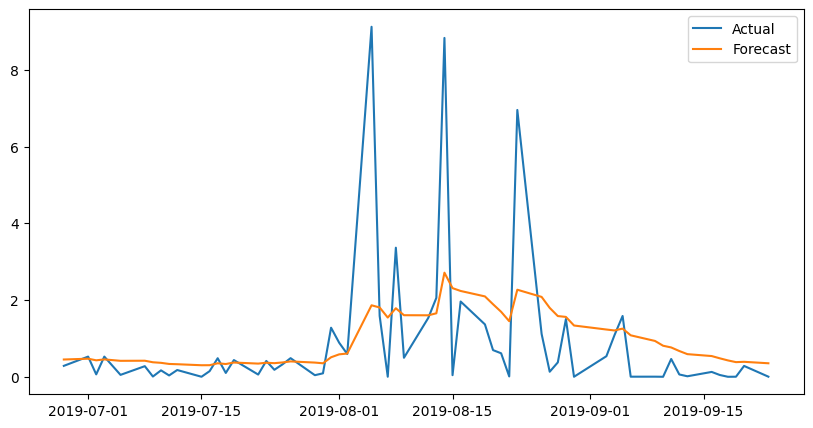

In [23]:
actual_var = pd.read_csv('./actual_var.csv', index_col=0, parse_dates=True)
forecast_var = pd.read_csv('./forcast_var.csv', index_col=0, parse_dates=True)
plt.figure(figsize=(10, 5))
plt.plot(actual_var, label='Actual')
plt.plot(forecast_var, label='Forecast')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def evaluate(observation, forecast): 
    # Call sklearn function to calculate MAE
    mae = mean_absolute_error(observation, forecast)
    print('Mean Absolute Error (MAE): {:.3g}'.format(mae))
    # Call sklearn function to calculate MSE
    mse = mean_squared_error(observation, forecast)
    print('Mean Squared Error (MSE): {:.3g}'.format(mse))
    return mae, mse

# Backtest model with MAE, MSE
evaluate(actual_var, forecast_var)

Mean Absolute Error (MAE): 0.802
Mean Squared Error (MSE): 2.37


(0.8023969577428532, 2.3733720191761143)